In [1]:
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv.zip to IMDb Movies India.csv.zip


In [5]:
import os
os.listdir()


['.config', 'IMDb Movies India.csv.zip', 'sample_data']

In [8]:
import pandas as pd
import zipfile

# Define the name of the zip file
zip_file_name = 'IMDb Movies India.csv.zip'
# Define the name of the CSV file inside the zip archive
csv_file_name = 'IMDb Movies India.csv'

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('.') # Extract to the current directory

# Now read the extracted CSV file, specifying a different encoding
df = pd.read_csv(csv_file_name, encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
df.shape


(15509, 10)

In [11]:
df.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [13]:
df.isnull().sum()


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [14]:
df.describe()


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [15]:
df.isnull().sum()


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [16]:
df.duplicated().sum()


np.int64(6)

In [18]:
df = df.drop_duplicates()


In [19]:
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.extract('(\d{4})')
df['Year'] = pd.to_numeric(df['Year'])


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-120015570.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Year'] = df['Year'].str.extract('(\d{4})')


In [20]:
df['Year'].head()


,Year
0,NaN
1,2019.0
2,2021.0
3,2019.0
4,2010.0


In [21]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [22]:
df['Votes'] = df['Votes'].astype(str)
df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')


In [23]:
top_movies = df.sort_values(by='Rating', ascending=False).head(10)
top_movies[['Name', 'Year', 'Rating']]


,Name,Year,Rating
8339,Love Qubool Hai,2020.0,10.0
5410,Half Songs,2021.0,9.7
2563,Breed,2020.0,9.6
5077,Gho Gho Rani,2019.0,9.4
14222,The Reluctant Crime,2020.0,9.4
6852,June,2021.0,9.4
11704,Ram-Path,2017.0,9.4
9105,Meher,2020.0,9.3
5125,God of gods,2019.0,9.3
11843,Refl3ct,2021.0,9.3


In [24]:
df.groupby('Year')['Rating'].mean().sort_values(ascending=False).head()


,Rating
Year,
1948.0,7.073684
1950.0,7.061290
1940.0,6.954545
1952.0,6.848148
1953.0,6.820690


In [26]:
# Combine all actor columns into a single Series and count actor occurrences
df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts().head(10)

,count
Mithun Chakraborty,241
Dharmendra,231
Ashok Kumar,227
Jeetendra,179
Amitabh Bachchan,178
Rekha,142
Rajesh Khanna,139
Shashi Kapoor,133
Shakti Kapoor,131
Shatrughan Sinha,131


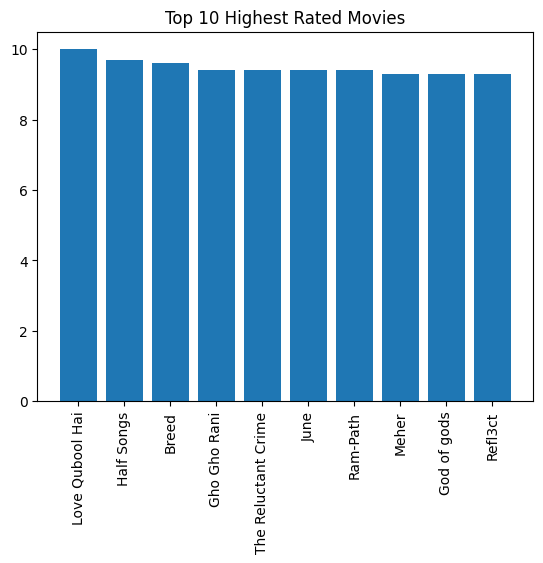

In [27]:
import matplotlib.pyplot as plt

top_movies = df.sort_values(by='Rating', ascending=False).head(10)

plt.figure()
plt.bar(top_movies['Name'], top_movies['Rating'])
plt.xticks(rotation=90)
plt.title("Top 10 Highest Rated Movies")
plt.show()


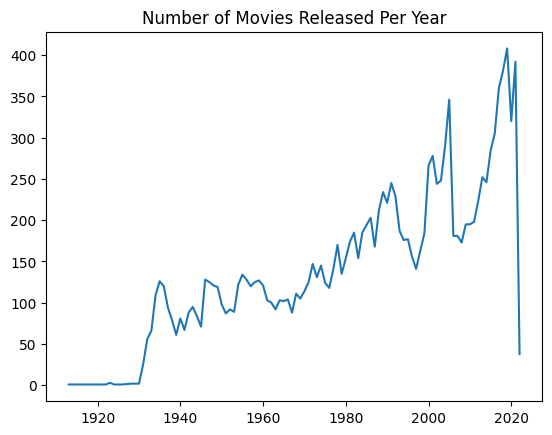

In [28]:
movies_per_year = df['Year'].value_counts().sort_index()

plt.figure()
plt.plot(movies_per_year)
plt.title("Number of Movies Released Per Year")
plt.show()


In [29]:
top_movies = df.sort_values(by='Rating', ascending=False).head(10)
top_movies[['Name', 'Year', 'Rating']]



,Name,Year,Rating
8339,Love Qubool Hai,2020.0,10.0
5410,Half Songs,2021.0,9.7
2563,Breed,2020.0,9.6
5077,Gho Gho Rani,2019.0,9.4
14222,The Reluctant Crime,2020.0,9.4
6852,June,2021.0,9.4
11704,Ram-Path,2017.0,9.4
9105,Meher,2020.0,9.3
5125,God of gods,2019.0,9.3
11843,Refl3ct,2021.0,9.3


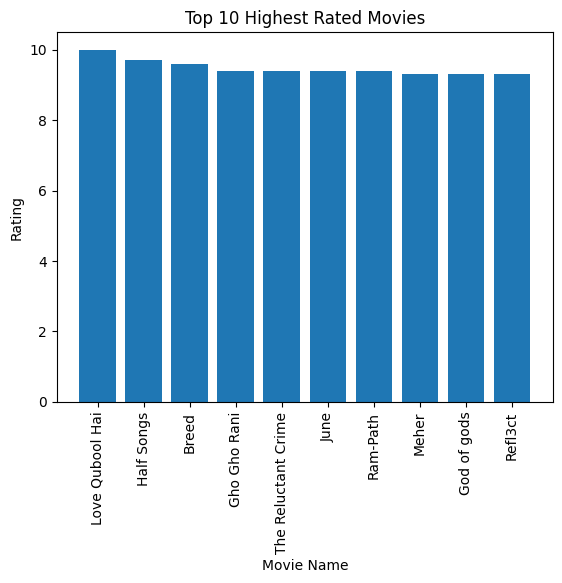

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(top_movies['Name'], top_movies['Rating'])
plt.xticks(rotation=90)
plt.title("Top 10 Highest Rated Movies")
plt.xlabel("Movie Name")
plt.ylabel("Rating")
plt.show()


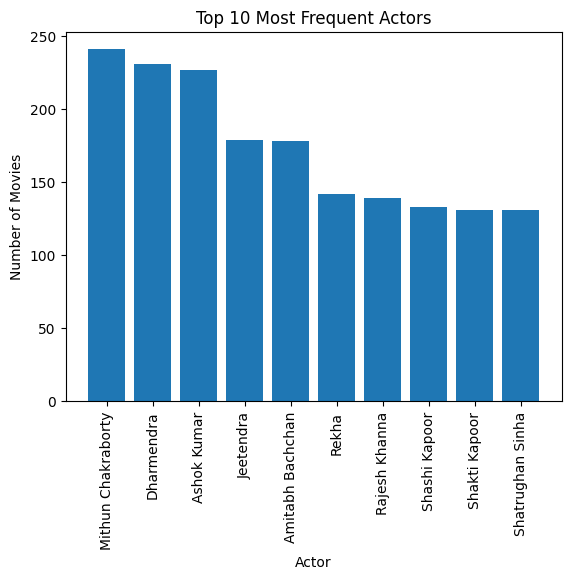

In [32]:
top_actors = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts().head(10)

plt.figure()
plt.bar(top_actors.index, top_actors.values)
plt.xticks(rotation=90)
plt.title("Top 10 Most Frequent Actors")
plt.xlabel("Actor")
plt.ylabel("Number of Movies")
plt.show()

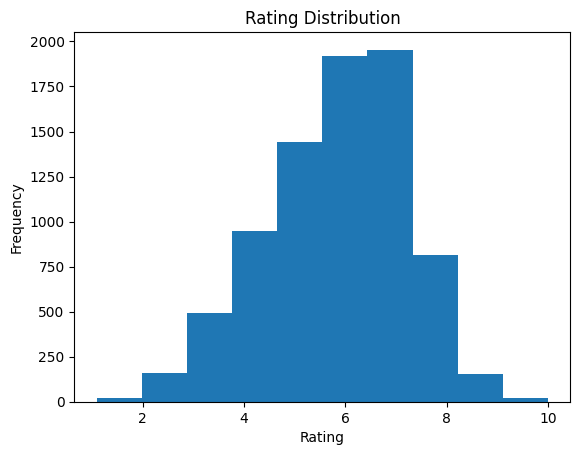

In [33]:
plt.figure()
plt.hist(df['Rating'].dropna())
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [34]:
df[['Rating', 'Votes', 'Year']].corr()


,Rating,Votes,Year
Rating,1.000000,0.126635,-0.166673
Votes,0.126635,1.000000,0.129016
Year,-0.166673,0.129016,1.000000


In [35]:
df_ml = df[['Year', 'Votes', 'Rating']].dropna()

X = df_ml[['Year', 'Votes']]
y = df_ml['Rating']


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
y_pred = model.predict(X_test)


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 1.0626096373868936
RMSE: 1.3260443154896855
R2 Score: 0.05419244135248502


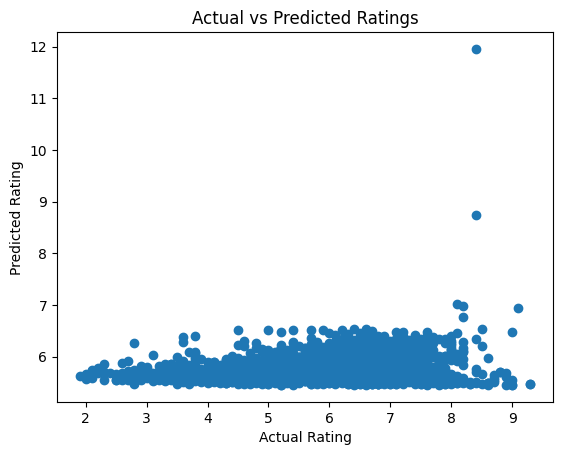

In [40]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings")
plt.show()
